In [2]:
from fastai.vision.all import *
import gradio as gr

In [3]:
def is_holdingweapon(x):
    return parent_label(x)

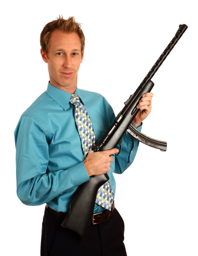

In [4]:
image = Image.open('human_weapon1.jpg')
# Create a PIL Image object from the opened image
pil_image = image.copy()
pil_image.to_thumb(256,256)

In [5]:
learn = load_learner('weapon_finder_model.pkl')

In [6]:
learn.predict(pil_image)

('human holding weapon', TensorBase(0), TensorBase([9.9961e-01, 3.9367e-04]))

In [7]:
categories = ('Human holding Weapon','Weapon')

def classify_image(img):
    pred,idx,probs = learn.predict(img)
    return dict(zip(categories,map(float,probs)))   #float because gradio doesnt take tensors

In [8]:
image = gr.inputs.Image(shape=(192,192))
label = gr.outputs.Label()

examples = ['human_weapon1.jpg','weapon22.jpg']

intf = gr.Interface(fn = classify_image,inputs = image,outputs=label,examples=examples)
intf.launch(inline = False,share = True)

/Users/dikshapaliwal/.pyenv/versions/3.9.16/lib/python3.9/site-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/Users/dikshapaliwal/.pyenv/versions/3.9.16/lib/python3.9/site-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/Users/dikshapaliwal/.pyenv/versions/3.9.16/lib/python3.9/site-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/Users/dikshapaliwal/.pyenv/versions/3.9.16/lib/python3.9/site-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://80982e5d8261b6ff39.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
